# <a id='toc1_'></a>[Assignment2 - Supervised Learning flow](#toc0_)

## <a id='toc1_1_'></a>[Part 1 - Student details](#toc0_)
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

**Table of contents**<a id='toc0_'></a>    
- [Assignment2 - Supervised Learning flow](#toc1_)    
  - [Part 1 - Student details](#toc1_1_)    
  - [Part 2 - Experiments](#toc1_2_)    
    - [Load the datasets](#toc1_2_1_)    
    - [EDA](#toc1_2_2_)    
      - [Correlation Heatmap](#toc1_2_2_1_)    
      - [Pclass](#toc1_2_2_2_)    
        - [Counts](#toc1_2_2_2_1_)    
        - [Relation To The Survival Rate](#toc1_2_2_2_2_)    
      - [Sex](#toc1_2_2_3_)    
        - [Counts](#toc1_2_2_3_1_)    
        - [Relation To The Survival Rate](#toc1_2_2_3_2_)    
      - [Basic statistics and Information About The Datasets](#toc1_2_2_4_)    
  - [Part 3 - Training flow](#toc1_3_)    
  - [Part 4 - Apply on test and show model performance estimation](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [18]:
# Liav Mordouch 3327
# Omer Kafe 0647
# Roi Cohen 2154
# student 4:
# (optional) student 5:
# (optional) student 6:

## <a id='toc1_2_'></a>[Part 2 - Experiments](#toc0_)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <a id='toc1_2_1_'></a>[Load the datasets](#toc0_)

In [20]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

# Display the first 5 rows of each dataset
# The default value of head() is 5 so we don't need to specify it

print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


### <a id='toc1_2_2_'></a>[EDA](#toc0_)

#### <a id='toc1_2_2_1_'></a>[Correlation Heatmap](#toc0_)
Using a correlation heatmap, we can see a correlation between two variables in the dataset. It's interesting to see that most variables do not have any correlation, except for the `SibSp` and the `Parch`, and the `fare` and the `survived` variables (which is definitely more interesting)

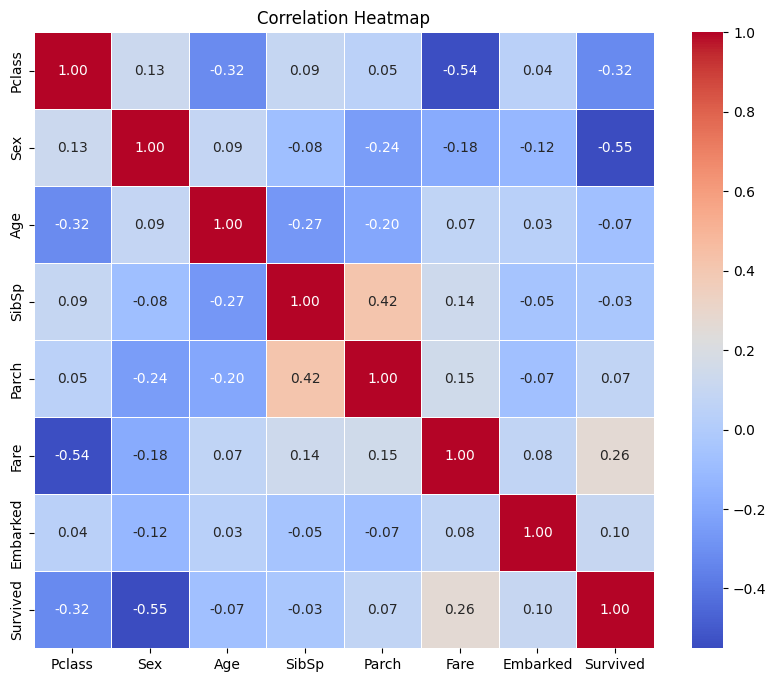

In [21]:
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### <a id='toc1_2_2_2_'></a>[Pclass](#toc0_)

##### <a id='toc1_2_2_2_1_'></a>[Counts](#toc0_)

In [22]:
pclass_counts = train_data.Pclass.value_counts()
print(pclass_counts)

Pclass
3    388
1    178
2    146
Name: count, dtype: int64


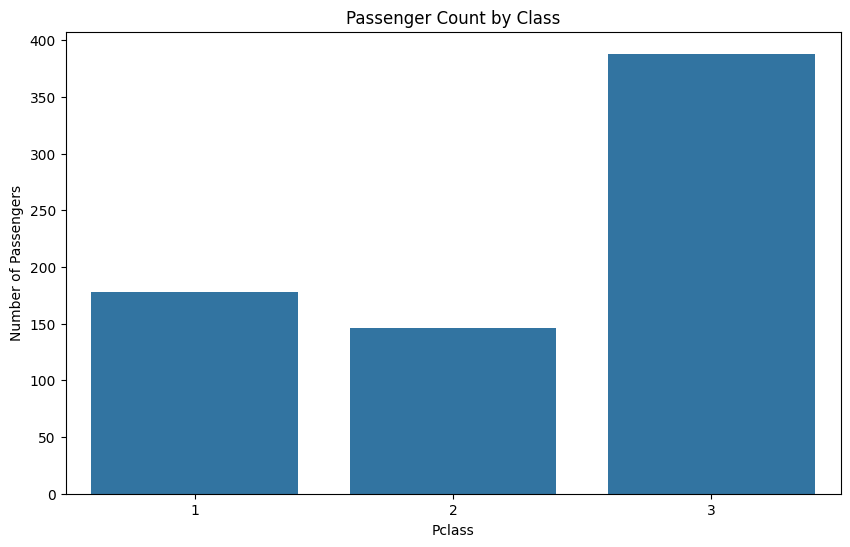

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=train_data)
plt.title('Passenger Count by Class')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.show()

##### <a id='toc1_2_2_2_2_'></a>[Relation To The Survival Rate](#toc0_)

In [24]:
survival_rates_Pclass = train_data.groupby('Pclass')['Survived'].mean()
df = pd.DataFrame(survival_rates_Pclass)
df.columns = ['Survival Rate']
df['Survival Rate'] = (df['Survival Rate'] * 100).map('{:.2f}%'.format)
print(df)

       Survival Rate
Pclass              
1             63.48%
2             45.89%
3             26.03%


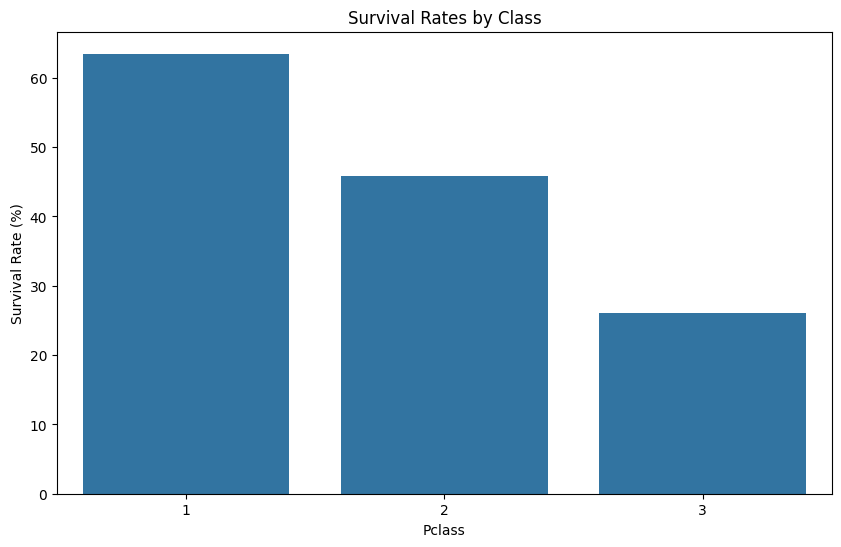

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates_Pclass.index, y=survival_rates_Pclass.values * 100)
plt.title('Survival Rates by Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.show()

#### <a id='toc1_2_2_3_'></a>[Sex](#toc0_)

##### <a id='toc1_2_2_3_1_'></a>[Counts](#toc0_)

In [26]:
Sex_counts = train_data.Sex.value_counts()
print(Sex_counts)

Sex
1    456
0    256
Name: count, dtype: int64


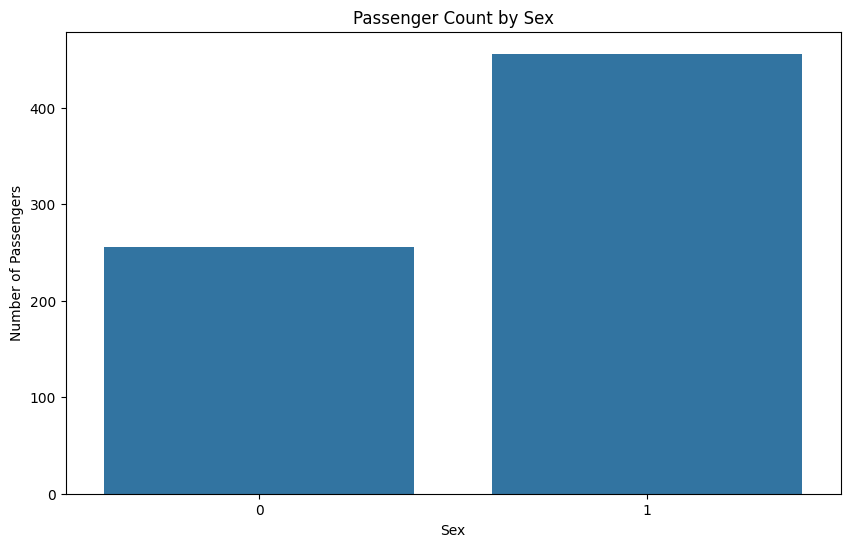

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=train_data)
plt.title('Passenger Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

##### <a id='toc1_2_2_3_2_'></a>[Relation To The Survival Rate](#toc0_)

In [28]:
survival_rates_Sex = train_data.groupby('Sex')['Survived'].mean()
df = pd.DataFrame(survival_rates_Sex)
df.columns = ['Survival Rate']
df['Survival Rate'] = (df['Survival Rate'] * 100).map('{:.2f}%'.format)
print(df)

    Survival Rate
Sex              
0          75.39%
1          19.30%


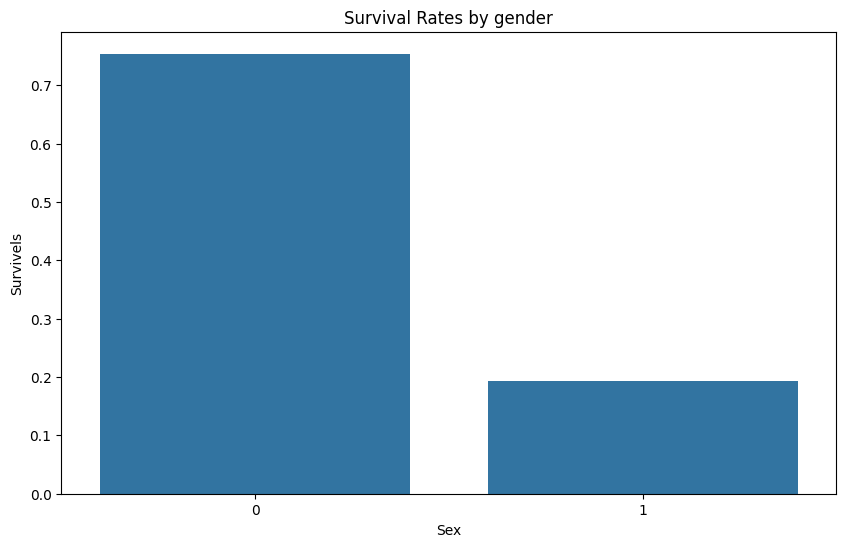

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates_Sex.index, y=survival_rates_Sex.values)
plt.title('Survival Rates by gender')
plt.xlabel('Sex')
plt.ylabel('Survivels')
plt.show()

#### <a id='toc1_2_2_4_'></a>[Basic statistics and Information About The Datasets](#toc0_)

In [30]:
print("Train Data Statistics:")
print(train_data.describe())

print("\nTest Data Statistics:")
print(test_data.describe())


Train Data Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

In [31]:
#information of the columns
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  


- we can see that there are not missing values. 
712 non-nulls in each of the columns on the train data.
179 non-nulls in each of the columns on the test data. 

## <a id='toc1_3_'></a>[Part 3 - Training flow](#toc0_)
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

## <a id='toc1_4_'></a>[Part 4 - Apply on test and show model performance estimation](#toc0_)